# 1. Import Python modules

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import pathlib
import random

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten,Activation, BatchNormalization,MaxPooling2D
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, f1_score, recall_score

import os
from os.path import exists

from utilsData import *
from utilsModel import *
#from DeepProbablisticScaling import *

# Configs

In [5]:
# folders to save NN model to file
if not exists("models/"):
    os.mkdir("models/")
    
# folder with datasets
data_path = "data/"

# name of the scenario
model_name = "pneumoniaMNIST"

delta = 1E-6
epsilon = 0.03

IMAGE_CHANNELS = 1 # 3 for rgb images

# 2. Load dataset

In [6]:
X = np.load(data_path + model_name +"_Images.npy")
Y = np.load(data_path + model_name +"_Labels.npy")


## 2.1 Data visualization

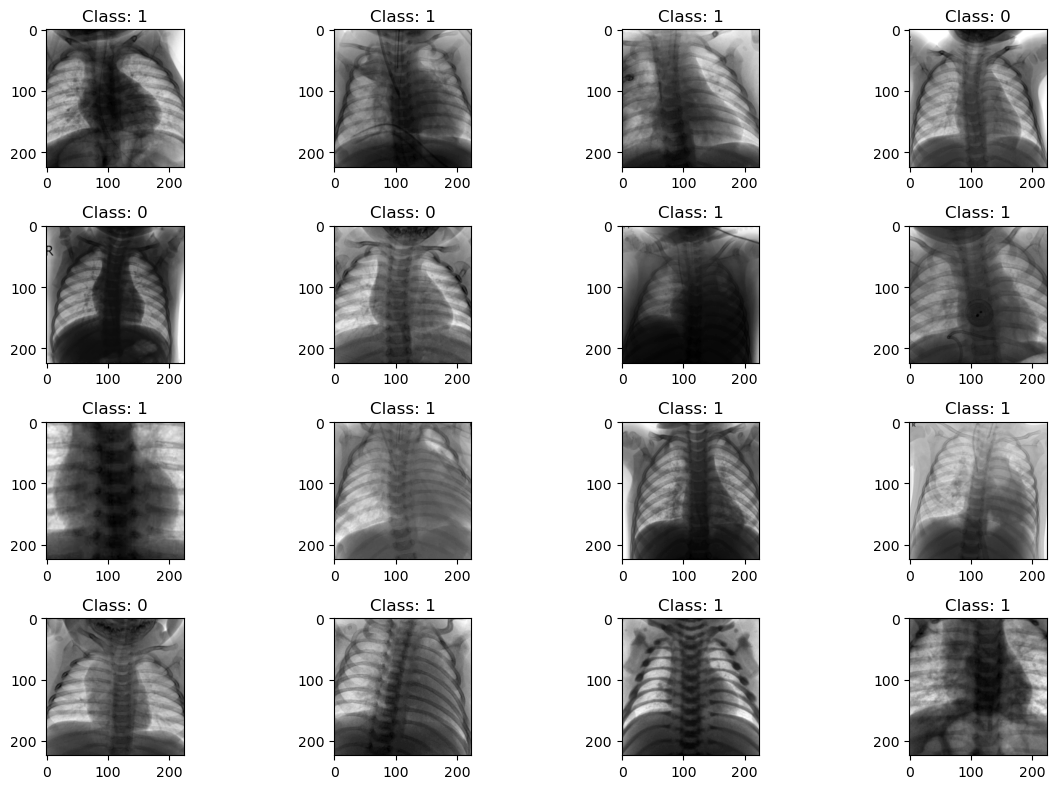

In [4]:
X_random = random.sample(list(X),16)
plt.figure(figsize=(12,8))

for i in range(16):
    plt.subplot(4, 4, i+1)
    
    #img = PIL.Image.open(str(image_file))
    plt.imshow(X[i],cmap = "binary")
    
    label = Y.squeeze()[i]
    plt.title(f"Class: {label}")


plt.tight_layout()
plt.show()

# 4. Train Test split and save

In [7]:

X_train, Y_train, X_cal, Y_cal, X_test, Y_test = SplitDataset(X, Y, delta, epsilon)

print('Training set size: ', len(Y_train))
print('Test set size: ', len(Y_test))
print('Calibration set size: ', len(Y_cal))

np.save(data_path + model_name+"_trainX.npy",X_train)
np.save(data_path + model_name+"_trainY.npy",Y_train)
np.save(data_path + model_name+"_testX.npy",X_test)
np.save(data_path + model_name+"_testY.npy",Y_test)
np.save(data_path + model_name+"_calX.npy",X_cal)
np.save(data_path + model_name+"_calY.npy",Y_cal)

Training set size:  658
Test set size:  1757
Calibration set size:  3441



# 5. Build convolutional neural network and train it

## 5.1 CNN architecture

In [8]:
IMAGE_WIDTH = X_train.shape[2]
IMAGE_HEIGHT = X_train.shape[1]
 # 1 for b&w images, 3 for rgb
# !! 
image_shape = (IMAGE_WIDTH, IMAGE_HEIGHT,IMAGE_CHANNELS)

model = CNN_Model(image_shape)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)    

## 5.2 Training

In [9]:
history=model.fit(X_train, Y_train, epochs=5)

Epoch 1/5


21/21 [==============================] - 37s 2s/step - loss: 0.5126 - accuracy: 0.8617
Epoch 2/5
21/21 [==============================] - 35s 2s/step - loss: 0.1689 - accuracy: 0.9468
Epoch 3/5
21/21 [==============================] - 36s 2s/step - loss: 0.1241 - accuracy: 0.9544
Epoch 4/5
21/21 [==============================] - 35s 2s/step - loss: 0.1018 - accuracy: 0.9681
Epoch 5/5
21/21 [==============================] - 34s 2s/step - loss: 0.0754 - accuracy: 0.9666


## 5.3 Save the model

In [10]:

model.save(f"models/{model_name}.keras")
# to load a trained model from file 
# model = keras.models.load_model('path/to/location.keras')